In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/FIGMA/RP

[Errno 2] No such file or directory: 'drive/MyDrive/FIGMA/RP'
/content/drive/MyDrive/FIGMA/RP


In [ ]:
ls

borrwoings-1960-2022.csv  external-1960.csv  gdp-1960.csv        Inflation.csv
csv1625205134.csv         external_debt.csv  gdp.csv             tot_debts.csv
csv1627810671_en.csv      foreign_debt.csv   inflation-1960.csv  tot_exp.xlsx


## Important Function

In [ ]:
 
#function for dataset -> dataframe
def converting_worldbank_dataset(s_year,dataframe):
    df=dataframe
    df.rename(columns = {'Country Name':'CountryName'}, inplace = True)
    index=df.query("CountryName == 'Sri Lanka'").index.to_list()[0]
    df.rename(columns = {'Indicator Name':'IndicatorName'}, inplace = True)
    ind_name=df["IndicatorName"].to_list()[0]
    column_index = df.columns.get_loc(s_year)
    year=df.columns.to_list()[column_index:]
    value=df.iloc[index, column_index:].to_list()
    new_df=pd.DataFrame(zip(year,value),columns =['Year',ind_name])
    return new_df

## Importing Libaraies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('external_debt.csv')

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GNI (current US$),NY.GNP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.563575e+09,2.688324e+09,2.838380e+09,2.848547e+09,2.921620e+09,2.987486e+09,3.215656e+09,2.541919e+09,3.033187e+09,NaN
1,Aruba,ABW,Total reserves in months of imports,FI.RES.TOTL.MO,NaN,NaN,NaN,NaN,NaN,NaN,...,3.171215e+00,3.387887e+00,4.244713e+00,5.036316e+00,4.801479e+00,4.624237e+00,4.737651e+00,8.128755e+00,8.608909e+00,NaN
2,Aruba,ABW,Total reserves (% of total external debt),FI.RES.TOTL.DT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Total reserves (includes gold, current US$)",FI.RES.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.531707e+08,6.803510e+08,8.158006e+08,9.225509e+08,9.071115e+08,9.802477e+08,9.823000e+08,1.212579e+09,1.512960e+09,NaN
4,Aruba,ABW,Multilateral debt service (% of public and pub...,DT.TDS.MLAT.PG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##External Debt Convertion

In [ ]:
#External Debt Convertion
df=pd.read_csv("external_debt.csv",sep=",")
year="1960"
debt=converting_worldbank_dataset(year,df)
#gdp = gdp.drop(gdp[gdp['Year'] == 'Unnamed: 66'].index) #Dropping rows with values:'Unnamed: 66'
debt['Year']=debt['Year'].astype(str).astype(int) #Converting object to int

debt.head()

,Year,GNI (current US$)
0,1960,1.406433e+09
1,1961,1.407027e+09
2,1962,1.438767e+09
3,1963,1.223818e+09
4,1964,1.306652e+09


In [ ]:
# Get the list of column names
column_names = debt.columns.tolist()

# Modify the name of the second column (index 1)
column_names[1] = 'ExternalDebt'


# Set the modified list of column names back to the dataframe
debt.columns = column_names
debt.head()


,Year,ExternalDebt
0,1960,1.406433e+09
1,1961,1.407027e+09
2,1962,1.438767e+09
3,1963,1.223818e+09
4,1964,1.306652e+09


In [ ]:
#Saving the processed debt dataframe
debt.to_csv('external-1960.csv',index=False)

In [ ]:
#External Debt Convertion
df=pd.read_csv("Inflation.csv",sep=",")
year="1960"
inflation=converting_worldbank_dataset(year,df)
inflation = inflation.drop(inflation[inflation['Year'] == 'Unnamed: 66'].index) #Dropping rows with values:'Unnamed: 66'
inflation['Year']=inflation['Year'].astype(str).astype(int) #Converting object to int

#changing column names
col_names=inflation.columns.tolist()
col_names[1]='Inflation%'
inflation.columns=col_names

inflation.to_csv('inflation-1960.csv',index=False)

In [ ]:
#External Debt Convertion
df=pd.read_csv("gdp.csv",sep=",")
year="1960"
gdp=converting_worldbank_dataset(year,df)
gdp = gdp.drop(gdp[gdp['Year'] == 'Unnamed: 66'].index) #Dropping rows with values:'Unnamed: 66'
gdp['Year']=gdp['Year'].astype(str).astype(int) #Converting object to int

#changing column names
col_names=gdp.columns.tolist()
col_names[1]='GDP'
gdp.columns=col_names
print(gdp)
gdp.to_csv('gdp-1960.csv',index=False)


    Year           GDP
0   1960  1.409874e+09
1   1961  1.444328e+09
2   1962  1.434156e+09
3   1963  1.240672e+09
4   1964  1.309748e+09
..   ...           ...
57  2017  9.437625e+10
58  2018  9.449385e+10
59  2019  8.901499e+10
60  2020  8.534911e+10
61  2021  8.892726e+10

[62 rows x 2 columns]


##Analysis

In [ ]:
#Reading the Dataset
external=pd.read_csv('external-1960.csv')
external.head()

,Year,ExternalDebt
0,1960,1.406433e+09
1,1961,1.407027e+09
2,1962,1.438767e+09
3,1963,1.223818e+09
4,1964,1.306652e+09


In [ ]:
external.isna().sum()

Year            0
ExternalDebt    1
dtype: int64

In [ ]:
external.dropna()

,Year,ExternalDebt
0,1960,1.406433e+09
1,1961,1.407027e+09
2,1962,1.438767e+09
3,1963,1.223818e+09
4,1964,1.306652e+09
...,...,...
57,2017,9.206162e+10
58,2018,9.209579e+10
59,2019,8.654559e+10
60,2020,8.306959e+10


<Axes: xlabel='ExternalDebt', ylabel='Count'>

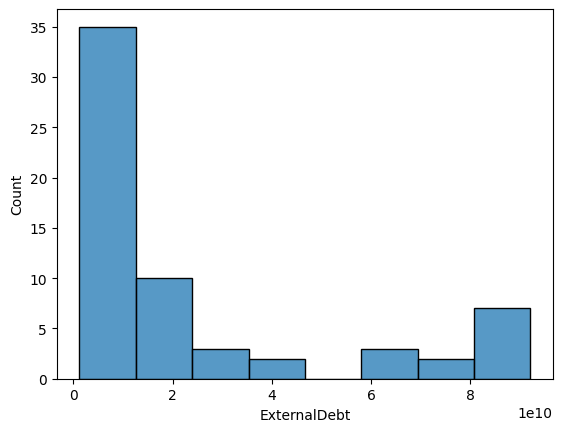

In [ ]:
sns.histplot(external,x='ExternalDebt')

<Axes: xlabel='Year'>

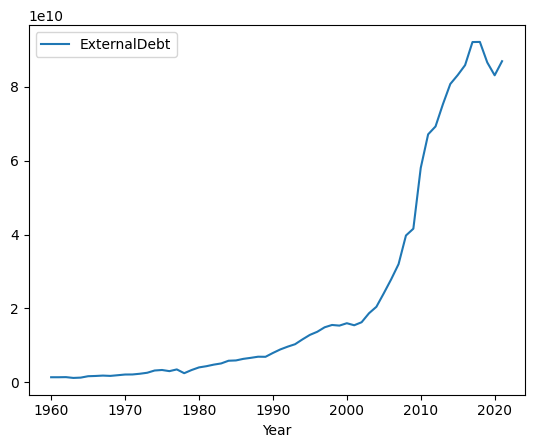

In [ ]:
external.plot("Year","ExternalDebt")

#Building of MA Model

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
external

,Year,ExternalDebt
0,1960,1.406433e+09
1,1961,1.407027e+09
2,1962,1.438767e+09
3,1963,1.223818e+09
4,1964,1.306652e+09
...,...,...
58,2018,9.209579e+10
59,2019,8.654559e+10
60,2020,8.306959e+10
61,2021,8.688279e+10


In [ ]:
adfuller_test(external.ExternalDebt)

ADF Test Statistic : nan
p-value : nan
#Lags Used : 0
Number of Observations Used : 62
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
external=external.reset_index()

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your yearly data is stored in a DataFrame called 'yearly_data' with columns "Year" and "ExternalDebt"
# Convert the "Year" column to datetime format
external['Year'] = pd.to_datetime(external['Year'], format='%Y')

# Set the "Year" column as the index
external.set_index('Year', inplace=True)

# Resample the data to quarterly frequency and interpolate missing values
quarterly_data = external.resample('Q').mean().interpolate()

# Perform seasonal decomposition
result = seasonal_decompose(quarterly_data['ExternalDebt'], model='additive', period=4)

# Extract the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Create a DataFrame with the decomposed components
quarterly_decomposition = pd.DataFrame({'Trend': trend, 'Seasonal': seasonal, 'Residual': residual})

# Adjust the seasonal component to have the same length as the original data
adjusted_seasonal = quarterly_decomposition['Seasonal'].repeat(1)[:len(quarterly_data)]

# Subtract the adjusted seasonal component from the original data
adjusted_data = quarterly_data['ExternalDebt'] - adjusted_seasonal

# Create a DataFrame with the adjusted data
adjusted_quarterly_data = pd.DataFrame({'ExternalDebt_Adjusted': adjusted_data})

# Combine the adjusted data with the trend and seasonal components
final_quarterly_data = adjusted_quarterly_data.join(quarterly_decomposition[['Trend', 'Seasonal']])


In [ ]:
adjusted_quarterly_data.tail(60)

,ExternalDebt_Adjusted
Year,
2007-06-30,3.393398e+10
2007-09-30,3.587075e+10
2007-12-31,3.780752e+10
2008-03-31,3.974429e+10
2008-06-30,4.020342e+10
2008-09-30,4.066255e+10
2008-12-31,4.112168e+10
2009-03-31,4.158081e+10
2009-06-30,4.569036e+10


In [ ]:
len(adjusted_quarterly_data)

249

In [ ]:
external[external['Year'] == 2021]


,Year,ExternalDebt
61,2021,8.688279e+10


In [ ]:
adjusted_quarterly_data=adjusted_quarterly_data.reset_index()

<Axes: xlabel='Year'>

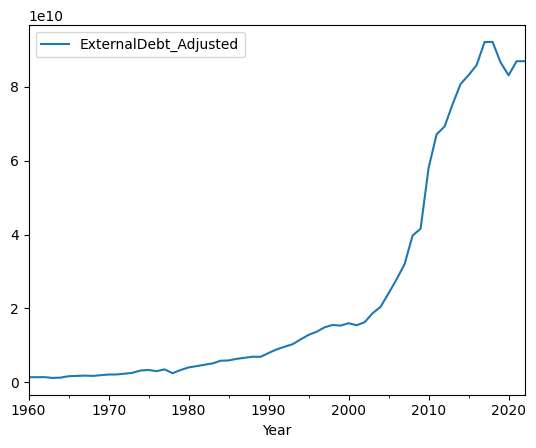

In [ ]:
adjusted_quarterly_data.plot("Year","ExternalDebt_Adjusted")


In [ ]:
len(external)

63

In [ ]:
adjusted_quarterly_data.to_csv("borrwoings-1960-2022.csv")